<a href="https://colab.research.google.com/github/XerXes4/Khashayar/blob/main/Pfizer_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Importing Data
from google.colab import files
df = files.upload()

Saving PFE.csv to PFE (2).csv


In [30]:
# Reading Data
df = pd.read_csv('PFE.csv')

In [31]:
df = df['Open'].values
df = df.reshape(-1, 1)
# Split Data into training and testing
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [33]:
# creat a Dataset
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [34]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [35]:
# reshape our data to use LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
# building Model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [37]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [38]:
# compile our model
model.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('PFE_stock_prediction.h5')

Epoch 1/50
137/137 [==============================] - 30s 163ms/step - loss: 0.0119
Epoch 2/50
137/137 [==============================] - 23s 165ms/step - loss: 0.0025
Epoch 3/50
137/137 [==============================] - 22s 163ms/step - loss: 0.0022
Epoch 4/50
137/137 [==============================] - 23s 169ms/step - loss: 0.0019
Epoch 5/50
137/137 [==============================] - 23s 166ms/step - loss: 0.0020
Epoch 6/50
137/137 [==============================] - 22s 164ms/step - loss: 0.0018
Epoch 7/50
137/137 [==============================] - 23s 165ms/step - loss: 0.0017
Epoch 8/50
137/137 [==============================] - 24s 172ms/step - loss: 0.0016
Epoch 9/50
137/137 [==============================] - 22s 164ms/step - loss: 0.0015
Epoch 10/50
137/137 [==============================] - 23s 165ms/step - loss: 0.0014
Epoch 11/50
137/137 [==============================] - 22s 164ms/step - loss: 0.0015
Epoch 12/50
137/137 [==============================] - 22s 164ms/step - lo

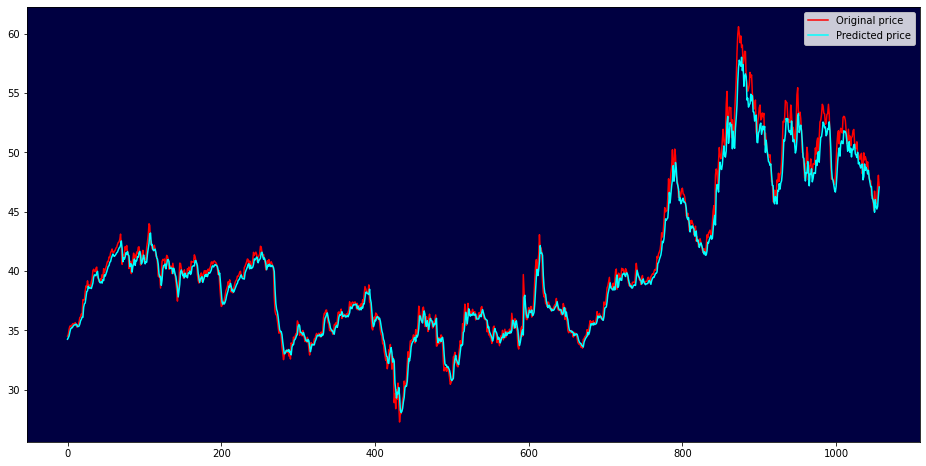

In [40]:
# Results visualization
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()